In [2]:
# Imported the relevant Python libraries

import numpy as np
import pandas as pd
from pathlib import Path
import os

In [3]:
# Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.

crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


INITIATING DATA PREPARATION SECTION...

In [4]:
# Dropping the unnamed column from the crypto_df

crypto_updated_df = crypto_df.drop('Unnamed: 0', axis=1)
crypto_updated_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
# Discard all cryptocurrencies that are not being traded. 
# In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.

crypto_trading_df = crypto_updated_df[crypto_updated_df['IsTrading'] == True]
crypto_trading_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
# Remove all rows that have at least one null value
crypto_notnull_df = crypto_trading_df.dropna()
crypto_notnull_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
crypto_notnull_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
# Filtering the Cryptocurrencies to identify the ones that are mined
crypto_mined_df = crypto_notnull_df[crypto_notnull_df['TotalCoinsMined'] > 0]
crypto_mined_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [9]:
crypto_mined_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

"IsTrading" column seems to be irrelevant for further analysis. Hence removing the same. Also making CoinName as Index of the dataframe

In [85]:
# Creating a new dataframe post Removing CoinName, IsTrading and TotalCoinSupply
crypto_clean_df = crypto_mined_df.drop(['CoinName','IsTrading'], axis=1)
crypto_clean_df.head()

crypto_label_df = crypto_mined_df["CoinName"]

USING LABELENCODER to create the dummy variables for the fields "Algorithm" and "ProofType"

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = crypto_clean_df.copy()
X['Algorithm'] = le.fit_transform(X['Algorithm']) 
X['ProofType'] = le.fit_transform(X['ProofType']) 
X.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
2,52,15,1.055185e+09,532000000
5,66,15,2.927942e+10,314159265359
7,47,12,1.792718e+07,21000000
8,20,12,1.076842e+08,0


Standardizing the dataset using skLearn StandardScaler()

In [87]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 ...
 [-2.14047761e+00  1.67233875e-03 -9.56133629e-02 -1.32179374e-01]
 [-1.66106109e+00  1.67233875e-03 -1.16948169e-01 -1.52559984e-01]
 [ 3.76459118e-01 -1.48113469e+00 -1.17105357e-01 -1.52855521e-01]]


DATA PREPARATION SECTION COMPLETED

INITIATING DIMENIONALITY REDUCTION...

In [88]:
# Performing dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca=pca.fit_transform(X_scaled)


In [89]:
crypto_pca_df = pd.DataFrame(
    data= X_pca, index=X.index, columns = ["PCA_Algorithm", "PCA_ProofType","PCA_TotalCoinsMined","PCA_TotalCoinsSupply"])
crypto_pca_df.head()

,PCA_Algorithm,PCA_ProofType,PCA_TotalCoinsMined,PCA_TotalCoinsSupply
0,-0.417875,0.810296,0.372138,-0.060307
2,-0.396564,0.815135,0.373256,-0.071187
5,3.124076,2.209780,0.504335,2.793738
7,-0.192083,0.016266,-0.072910,-0.018041
8,-0.044116,-1.167492,1.012525,-0.147192


USING t-SNE to reduce the dimensions and inspect the result

In [90]:
from sklearn.manifold import TSNE

labels = crypto_label_df

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)

# The dataset has 2 columns
tsne_features.shape

(532, 2)

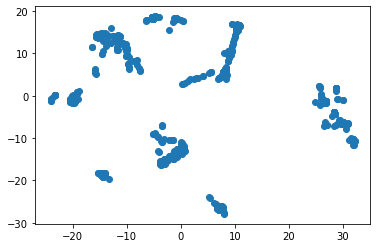

In [91]:
import matplotlib.pyplot as plt

# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

Based on the Cluster, what we see are multiple cluster throughout the scatter plot.

DIMENSIONALITY REDUCTION COMPLETED

INITIALIZING CLUSTER ANALYSIS USING k-Means...

In [92]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\sunny\anaconda3\envs\PythonData2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,k,inertia
0,1,230378.750064
1,2,128457.503519
2,3,66015.951362
3,4,33606.951060
4,5,23334.044122
5,6,15662.963726
6,7,12009.218131
7,8,8674.662134
8,9,6618.654796


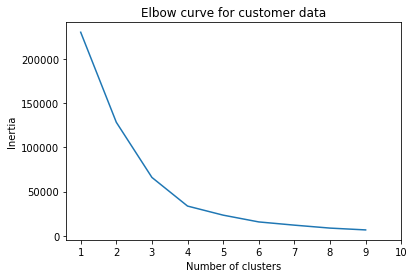

In [93]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Just looking at the Elbow curve, i can see that at k = 6 the change has started to more consistant in nature. I will be using k = 6 for further analysis.

In [94]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [95]:
clusters = get_clusters(6, crypto_pca_df)
clusters

,PCA_Algorithm,PCA_ProofType,PCA_TotalCoinsMined,PCA_TotalCoinsSupply,x,y,class
0,-0.417875,0.810296,0.372138,-0.060307,-15.744094,14.361965,1
2,-0.396564,0.815135,0.373256,-0.071187,-9.881721,11.306578,1
5,3.124076,2.209780,0.504335,2.793738,0.266940,2.812938,5
7,-0.192083,0.016266,-0.072910,-0.018041,-14.495873,-18.323013,4
8,-0.044116,-1.167492,1.012525,-0.147192,9.399209,10.514136,5
...,...,...,...,...,...,...,...
1238,0.584290,-2.080384,-2.437705,0.213433,30.059397,-1.067639,2
1242,-0.415122,0.810892,0.372691,-0.057958,-11.186574,13.971763,1
1245,0.037594,-1.599930,1.417612,-0.193516,8.274179,5.419693,5
1246,-0.034543,-1.255503,1.092984,-0.154865,9.207198,9.681773,5


In [96]:
def show_clusters(df):
    plt.scatter(df['PCA_Algorithm'], df['PCA_TotalCoinsMined'], c=df['class'])
    plt.xlabel('PCA_Algorithm')
    plt.ylabel('PCA_TotalCoinsMined')
    plt.show()



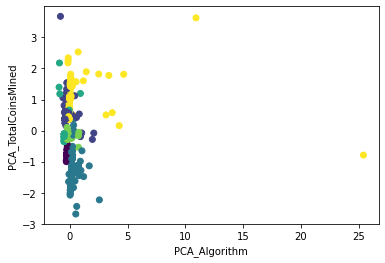

In [97]:
 show_clusters(clusters)

In [98]:
clustered_df = crypto_mined_df.merge(clusters, how='outer', left_index=True, right_index=True)
#del clustered_df.index.name
clustered_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,PCA_Algorithm,PCA_ProofType,PCA_TotalCoinsMined,PCA_TotalCoinsSupply,x,y,class
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,-0.417875,0.810296,0.372138,-0.060307,-15.744094,14.361965,1
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,-0.396564,0.815135,0.373256,-0.071187,-9.881721,11.306578,1
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,3.124076,2.209780,0.504335,2.793738,0.266940,2.812938,5
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,-0.192083,0.016266,-0.072910,-0.018041,-14.495873,-18.323013,4
8,Ethereum,Ethash,True,PoW,1.076842e+08,0,-0.044116,-1.167492,1.012525,-0.147192,9.399209,10.514136,5


In [99]:
import plotly.figure_factory as ff
import plotly.express as px

fig = px.scatter_3d(
    clustered_df,
    x="PCA_Algorithm",
    y="PCA_ProofType",
    z="PCA_TotalCoinsMined",
    hover_name="CoinName",
    #hover_data=["Algorithm"],
    color="class",
    symbol="class",
    width=800
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

CONCLUSION:
1. The clustering would be beneficial for this example based on the data provided by the clients.
2. After using the concepts of Dimension Reduction and Cluster Analysis, an elbow curve was created to identify a valid "k" value for the cluster. I determined based on the Elbow curve, k = 6 (6 clusters) would be the most effective
3. Using PCA and t-SNE technicique for dimesnion reduction we were able to successfully identify the right amount of clusters
4. Based on the 3D Scatter plot, we can assume that 2 cryptocurrencies "Komodo" and "BitTorrent" can be excluded from the dataset to acheive a better cluster. They may potentially be incorrect data or out of scale